In [1]:
## 相关库
import os, shutil
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
################################################################# 准备主要数据目录

### 准备训练数据目录
base_dir = '../data/newCatAndDog' 

origin_cats_dir='../data/CatAndDogDatasets/training_set/training_set/cats'
origin_dogs_dir='../data/CatAndDogDatasets/training_set/training_set/dogs'

origin_test_cats_dir='../data/CatAndDogDatasets/test_set/test_set/cats'
origin_test_dogs_dir='../data/CatAndDogDatasets/test_set/test_set/dogs'

### 训练数据目录
train_dir = os.path.join(base_dir, 'train') 
# os.mkdir(train_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs') 
# os.mkdir(train_dogs_dir) 
train_cats_dir = os.path.join(train_dir, 'cats') 
# os.mkdir(train_cats_dir)

### 测试数据目录
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir) 
test_cats_dir = os.path.join(test_dir, 'cats') 
# os.mkdir(test_cats_dir) 
test_dogs_dir = os.path.join(test_dir, 'dogs') 
# os.mkdir(test_dogs_dir) 

### 验证数据目录
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats') 
# os.mkdir(validation_cats_dir) 
validation_dogs_dir = os.path.join(validation_dir, 'dogs') 
# os.mkdir(validation_dogs_dir) 

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,3500)] 
for fname in fnames:
 src = os.path.join(origin_cats_dir, fname)
 dst = os.path.join(train_cats_dir, fname)
 shutil.copyfile(src, dst) 
fnames = ['cat.{}.jpg'.format(i) for i in range(3501, 4000)] 
for fname in fnames:
 src = os.path.join(origin_cats_dir, fname)
 dst = os.path.join(validation_cats_dir, fname)
 shutil.copyfile(src, dst) 
fnames = ['cat.{}.jpg'.format(i) for i in range(4001, 5000)] 
for fname in fnames:
 src = os.path.join(origin_test_cats_dir, fname)
 dst = os.path.join(test_cats_dir, fname)
 shutil.copyfile(src, dst) 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,3500)] 
for fname in fnames:
 src = os.path.join(origin_dogs_dir, fname)
 dst = os.path.join(train_dogs_dir, fname)
 shutil.copyfile(src, dst) 
fnames = ['dog.{}.jpg'.format(i) for i in range(3501, 4000)] 
for fname in fnames:
 src = os.path.join(origin_dogs_dir, fname)
 dst = os.path.join(validation_dogs_dir, fname)
 shutil.copyfile(src, dst) 
fnames = ['dog.{}.jpg'.format(i) for i in range(4001, 5000)] 
for fname in fnames:
 src = os.path.join(origin_test_dogs_dir, fname)
 dst = os.path.join(test_dogs_dir, fname)
 shutil.copyfile(src, dst)

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)),
      '\ntotal training dog images:', len(os.listdir(train_dogs_dir)),
     '\ntotal validation cat images:', len(os.listdir(validation_cats_dir)),
     '\ntotal validation dog images:', len(os.listdir(validation_dogs_dir)),
      '\ntotal test cat images:', len(os.listdir(test_cats_dir)),
      '\ntotal test dog images:', len(os.listdir(test_dogs_dir))
     ) 

total training cat images: 2500 
total training dog images: 2500 
total validation cat images: 499 
total validation dog images: 499 
total test cat images: 1000 
total test dog images: 999


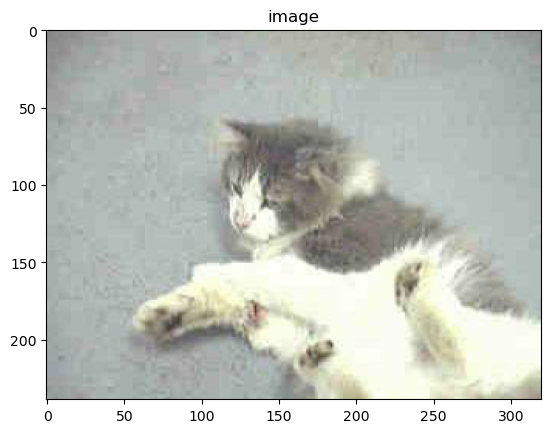

In [4]:
img = Image.open(os.path.join(train_cats_dir, os.listdir(train_cats_dir)[0]))

plt.figure("train_cats[0]") # 图像窗口名称
plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像题目
plt.show()

In [5]:
################ 定义神经网络
from keras import layers
from keras import models 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers 
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
model.summary()

2023-07-03 00:56:40.783617: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-03 00:56:40.785199: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 00:56:40.809959: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 00:56:40.810348: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 00:56:41.196710: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
##### 图像预处理
# (1) 读取图像文件。
# (2) 将 JPEG 文件解码为 RGB 像素网格。
# (3) 将这些像素网格转换为浮点数张量。
# (4) 将像素值（0~255 范围内）缩放到 [0, 1] 区间（正如你所知，神经网络喜欢处理较小的输入值）。
# 使用keras自带的函数完成上述操作，也可以用python完成
from keras.preprocessing.image import ImageDataGenerator 
# train_datagen = ImageDataGenerator(rescale=1./255) 
### 训练数据增强
train_datagen = ImageDataGenerator(
                                 rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,)  


test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
                                         train_dir, 
                                         target_size=(150, 150), 
                                         batch_size=32,
                                         class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
                                         validation_dir,
                                         target_size=(150, 150),
                                         batch_size=20,
                                         class_mode='binary')

  

Found 5000 images belonging to 2 classes.
Found 998 images belonging to 2 classes.


In [7]:
history = model.fit(
 x=train_generator,
 steps_per_epoch=100,
 epochs=100,
 validation_data=validation_generator,
 validation_steps=50)


Epoch 1/100


2023-07-03 00:56:42.158459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - ETA: 0s - loss: 0.6949 - acc: 0.5082

2023-07-03 00:57:00.499478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) +1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend() 
plt.show()

In [ ]:
model.save('cats_and_dogs_small_2.h5')